## Data Cleaning, Describing, and Visualization

### Step 1 - Get your environment setup

1. Install Git on your computer and fork the class repository on [Github](https://github.com/tfolkman/byu_econ_applied_machine_learning).
2. Install [Anaconda](https://conda.io/docs/install/quick.html) and get it working.

### Step 2 - Explore Datasets

The goals of this project are:

1. Read in data from multiple sources
2. Gain practice cleaning, describing, and visualizing data

To this end, you need to find from three different sources. For example: CSV, JSON, and API, SQL, or web scraping. For each of these data sets, you must perform the following:

1. Data cleaning. Some options your might consider: handle missing data, handle outliers, scale the data, convert some data to categorical.
2. Describe data. Provide tables, statistics, and summaries of your data.
3. Visualize data. Provide visualizations of your data.

These are the typical first steps of any data science project and are often the most time consuming. My hope is that in going through this process 3 different times, that you will gain a sense for it.

Also, as you are doing this, please tell us a story. Explain in your notebook why are doing what you are doing and to what end. Telling a story in your analysis is a crucial skill for data scientists. There are almost an infinite amount of ways to analyze a data set; help us understand why you choose your particular path and why we should care.

Also - this homework is very open-ended and we provided you with basically no starting point. I realize this increases the difficulty and complexity, but I think it is worth it. It is much closer to what you might experience in industry and allows you to find data that might excite you!

### Grading

This homework is due **Oct. 2, 2018 by 4:30pm Utah time.** By that time, you need to have committed all your code to your github and submitted a link to your work to the TA. We can see on your Github account when you last committed code. :)

Rubric:

* Code Quality - 10%
* Ability to read in data - 10%
* Ability to describe data - 20%
* Ability to visualize data - 20%
* Ability to clean data - 20%
* Storytelling - 20%

In [1]:
import numpy as np
import json
import pandas as pd
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import sqlite3 as sql
import matplotlib.pyplot as plt

In [2]:
# I'm always interested in GDP. I tend to be a macro guy in that. I like the overall economy.

In [3]:
# import json GDP
with open("gdp.json","r") as f:
    json_data = json.load(f)
json_data

[{'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
  'country': {'id': 'US', 'value': 'United States'},
  'value': None,
  'decimal': '0',
  'date': '2018'},
 {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
  'country': {'id': 'US', 'value': 'United States'},
  'value': '19390604000000',
  'decimal': '0',
  'date': '2017'},
 {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
  'country': {'id': 'US', 'value': 'United States'},
  'value': '18624475000000',
  'decimal': '0',
  'date': '2016'},
 {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
  'country': {'id': 'US', 'value': 'United States'},
  'value': '18120714000000',
  'decimal': '0',
  'date': '2015'},
 {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
  'country': {'id': 'US', 'value': 'United States'},
  'value': '17427609000000',
  'decimal': '0',
  'date': '2014'},
 {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current

In [4]:
# load it into a Dataframe
dataframe = pd.DataFrame(json_data)
# visualize head to msee what we have to work with
dataframe.head()

,country,date,decimal,indicator,value
0,"{'id': 'US', 'value': 'United States'}",2018,0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...",None
1,"{'id': 'US', 'value': 'United States'}",2017,0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...",19390604000000
2,"{'id': 'US', 'value': 'United States'}",2016,0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...",18624475000000
3,"{'id': 'US', 'value': 'United States'}",2015,0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...",18120714000000
4,"{'id': 'US', 'value': 'United States'}",2014,0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...",17427609000000


In [5]:
# We see that the first entry has a NaN, we need to drop it
dropped_data = dataframe.drop(0)
# Lets look at the head again
dropped_data

,country,date,decimal,indicator,value
1,"{'id': 'US', 'value': 'United States'}",2017,0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...",19390604000000
2,"{'id': 'US', 'value': 'United States'}",2016,0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...",18624475000000
3,"{'id': 'US', 'value': 'United States'}",2015,0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...",18120714000000
4,"{'id': 'US', 'value': 'United States'}",2014,0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...",17427609000000
5,"{'id': 'US', 'value': 'United States'}",2013,0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...",16691517000000
6,"{'id': 'US', 'value': 'United States'}",2012,0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...",16155255000000
7,"{'id': 'US', 'value': 'United States'}",2011,0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...",15517926000000
8,"{'id': 'US', 'value': 'United States'}",2010,0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...",14964372000000
9,"{'id': 'US', 'value': 'United States'}",2009,0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...",14418739000000
10,"{'id': 'US', 'value': 'United States'}",2008,0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...",14718582000000


In [6]:
# Let's see the min we'ave had since 1960
dropped_data["value"].astype('int64').min()

543300000000

In [7]:
# I wanna know when we had over 1 trillion dollars as our GDP
dropped_data['value'].astype('int64') > 1000000000000
#first year was 1969, COOL!

1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
30     True
31     True
32     True
33     True
34     True
35     True
36     True
37     True
38     True
39     True
40     True
41     True
42     True
43     True
44     True
45     True
46     True
47     True
48     True
49     True
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
Name: value, dtype: bool

In [8]:
dropped_data["value"].astype('int64').max()
#sns.distplot(dropped_data.value, kde=False)

19390604000000

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


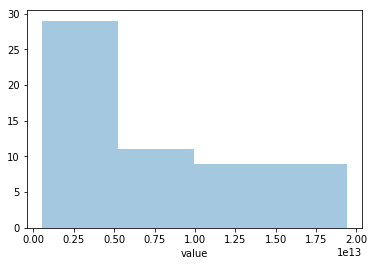

In [9]:
sns.distplot(dropped_data.value.astype('int64'), kde=False)

#### 

In [10]:
#NOW WE DO SOME WEB SCRAPING

In [11]:
site_text = requests.get("https://www.thumbtack.com/ut/orem/carpet-cleaning/pest-control-landscaping-cleaning-services?service_pk=215790528574465177&category_pk=133665232699441654&lp_request_pk=349581764301316116&zip_code=84602&lp_path=%2Fut%2Fprovo%2Fexterminators%2F&click_origin=pro%20list%2Fclick%20pro%20name&urgency_signal=low_price").text
soup = BeautifulSoup(site_text, 'html.parser')

In [12]:
#soup.prettify()
soup.get_text()

'My Guy Pest & Lawn Solutions - Orem, UThttps://app.thumbtack.com/graphqldataLayer = [];(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\': new Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],j=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);j.addEventListener(\'error\', () => w.gtm_script_failed = true, false);})(window,document,\'script\',\'dataLayer\',\'GTM-N3FZSVQ\');window.global = window;\n            window.TT_CSRF_TOKEN = "tAGLVDaCDF4EBEpi1FFskMP9tDW0tIlAUntG07UBJ2";\n            window.TT_FB_KEY = "131357050011";\n            window.RESPONSIVENESS_KEY = "1ut6ph6su52pg206cmlmvgq823t7t0tpqv28omoeais2fsdlkrfb";\n        No results to show.Join as a proSign upLog inPest Control Services\xa0• 84602No results to show.HomeJoin as a proSign upLog inServicesReviewsPhotosFAQsServicesReviewsPhotosMy Guy Pest & Lawn Solutions4.9  (92)Loadingcalculati

In [13]:
#toc = soup.find("@type")
#topic_list = [a.text for a in toc.find_all('a')]

In [14]:
# i gave up on the web scrape cuz i don't understand how to use it

In [15]:
# I'm thinking about going to graduate school, I wonder what I need to get in

In [16]:
here = pd.read_csv('Admission_Predict.csv')

In [17]:
#lets take a look at a sample of our data and see what we have to work with
here.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [18]:
# just in case, lets clean any missing values
cleaned_here = here.dropna()

In [19]:
# I do research with a professor, is that required?
cleaned_here["Research"].value_counts()
# looks like I don't have to do research to get into graduate school

1    219
0    181
Name: Research, dtype: int64

In [20]:
# I wonder what the average of the gpas were
cleaned_here["CGPA"].mean()
# Unfortunately this doesn't help me because I don't know how to convert to CGPA

8.598924999999998

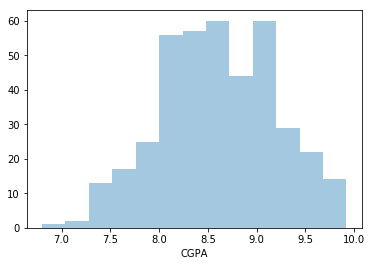

In [21]:
# Lets see the distribution on that
sns.distplot(cleaned_here.CGPA, kde=False)

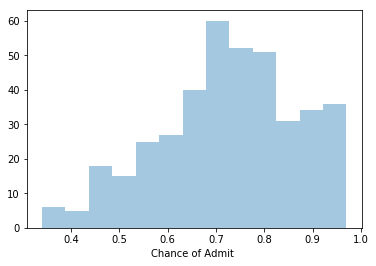

In [22]:
sns.distplot(cleaned_here['Chance of Admit '], kde=False)
# I want to know what their chances of admittal were

In [23]:
# I'm gonna give SQL a shot
# I have a cabin and am interested in fires that could harm it

In [24]:
#read in the database, let's treat it as a pandas dataframe
try:
    with sql.connect("FPA_FOD_20170508.sqlite") as conn:
        cur = conn.cursor()
        data = pd.read_sql_query("SELECT * FROM fires", conn)
finally:    
    conn.close()

In [25]:
# as always, I need to see what I have to work with. THis time using .columns
data.columns


Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')

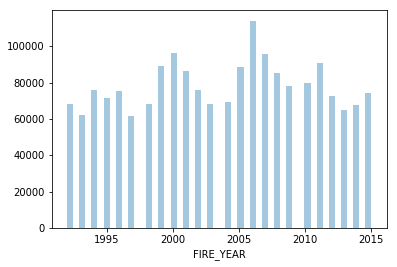

In [26]:
# lets plot the years of the fires and see what we find
sns.distplot(data.FIRE_YEAR, kde=False)
# interesting how it does this up and down thing, almost cyclical every 5 years

In [27]:
# lets see how many fires happen in utah, where my cabin is
data["STATE"].value_counts()
# that's a lot, but its comforting we're not near the top of the list

CA    189550
GA    168867
TX    142021
NC    111277
FL     90261
SC     81315
NY     80870
MS     79230
AZ     71586
AL     66570
OR     61088
MN     44769
OK     43239
MT     40767
NM     37478
ID     36698
CO     34157
WA     33513
WI     31861
AR     31663
TN     31154
SD     30963
UT     30725
LA     30013
KY     27089
NJ     25949
PR     22081
WV     21967
VA     21833
MO     17953
NV     16956
ND     15201
WY     14166
ME     13150
AK     12843
MI     10502
HI      9895
PA      8712
NE      7973
KS      7673
CT      4976
IA      4134
MD      3622
OH      3479
MA      2626
NH      2452
IL      2327
IN      2098
RI       480
VT       456
DE       171
DC        66
Name: STATE, dtype: int64

In [28]:
# Now lets consider just the state of Utah
# first we wipe out data to save memory
data = 0
try:
    with sql.connect("FPA_FOD_20170508.sqlite") as conn:
        cur = conn.cursor()
        data = pd.read_sql_query("SELECT * FROM fires WHERE fires.STATE = 'UT' ", conn)
finally:
    conn.close()

In [29]:
# Let's visualize the first few data points
data.head()


,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,64,64,FS-1418993,FED,FS-FIRESTAT,FS,USUTUWF,Uinta/Wasatch-Cache National Forest,0418,Uinta National Forest,...,A,40.088889,-111.378333,5.0,USFS,UT,49,049,Utah,b'\x00\x01\xad\x10\x00\x00\x8c\xd5\xff\x9c6\xd...
1,196,199,FS-1419324,FED,FS-FIRESTAT,FS,USUTUWF,Uinta/Wasatch-Cache National Forest,0419,Wasatch-Cache-Uinta National Forest,...,A,41.264167,-111.795833,5.0,USFS,UT,57,057,Weber,b'\x00\x01\xad\x10\x00\x00\xacZ\xeb\xee\xee\xf...
2,593,600,FS-1420231,FED,FS-FIRESTAT,FS,USUTUWF,Uinta/Wasatch-Cache National Forest,0419,Wasatch-Cache-Uinta National Forest,...,A,41.258333,-111.849722,5.0,USFS,UT,57,057,Weber,b'\x00\x01\xad\x10\x00\x00heN\xd9a\xf6[\xc0\x9...
3,821,833,FS-1420633,FED,FS-FIRESTAT,FS,USUTMLF,Manti-Lasal National Forest,0410,Manti-Lasal National Forest,...,A,39.316667,-111.228333,5.0,USFS,UT,15,015,Emery,b'\x00\x01\xad\x10\x00\x00\xf0;f\x03\x9d\xce[\...
4,839,851,FS-1420681,FED,FS-FIRESTAT,FS,USUTDIF,Dixie National Forest,0407,Dixie National Forest,...,A,37.871944,-111.658056,5.0,USFS,UT,17,017,Garfield,b'\x00\x01\xad\x10\x00\x00\xa8I\x11\x95\x1d\xe...


In [30]:
# I wanna know what county they're in
data["FIPS_NAME"].value_counts()

San Juan      2145
Utah          1751
Washington    1586
Iron          1560
Tooele        1560
Kane          1441
Box Elder     1133
Juab          1078
Millard       1070
Summit         878
Uintah         789
Grand          777
Beaver         735
Sanpete        699
Sevier         664
Duchesne       653
Garfield       604
Carbon         504
Wasatch        467
Cache          397
Morgan         344
Weber          315
Emery          276
Daggett        231
Rich           173
Salt Lake      106
Piute          105
Wayne           91
Davis           75
Name: FIPS_NAME, dtype: int64

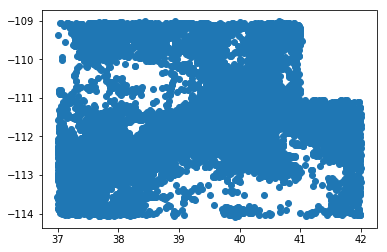

In [31]:
#that wasn't too comforting, maybe a map will help me see where they were
plt.scatter(data["LATITUDE"], data["LONGITUDE"], )
plt.show()

In [32]:
data["FIRE_SIZE_CLASS"].value_counts()

A    19047
B     8056
C     2091
D      574
E      455
F      358
G      144
Name: FIRE_SIZE_CLASS, dtype: int64

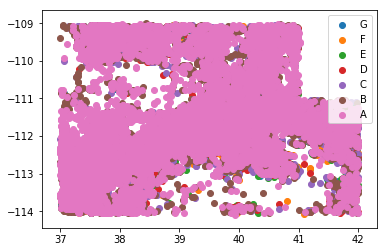

In [33]:
# let's instead map everything based on their fire class
datag = data[data["FIRE_SIZE_CLASS"] == 'G']
dataf = data[data["FIRE_SIZE_CLASS"] == 'F']
plt.scatter(datag["LATITUDE"], datag["LONGITUDE"], label="G")
plt.scatter(dataf["LATITUDE"], dataf["LONGITUDE"], label="F")
datae = data[data["FIRE_SIZE_CLASS"] == 'E']
plt.scatter(datae["LATITUDE"], datae["LONGITUDE"], label="E")
datad = data[data["FIRE_SIZE_CLASS"] == 'D']
plt.scatter(datad["LATITUDE"], datad["LONGITUDE"], label="D")
datac = data[data["FIRE_SIZE_CLASS"] == 'C']
plt.scatter(datac["LATITUDE"], datac["LONGITUDE"], label="C")
datab = data[data["FIRE_SIZE_CLASS"] == 'B']
plt.scatter(datab["LATITUDE"], datab["LONGITUDE"], label="B")
dataa = data[data["FIRE_SIZE_CLASS"] == 'A']
plt.scatter(dataa["LATITUDE"], dataa["LONGITUDE"], label="A")
plt.legend()
plt.show()